In [1]:
import geopandas
import scipy as sp
import pandas as pd
import numpy as np
import numpy 
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor

In [27]:
os.chdir('/Users/Edward/Documents/LandPermitAnalysis/data/')

In [33]:
data = pd.read_csv('Land_Use_Permits.csv').copy()
data.head(5)

PermitNum           PermitClass PermitClassMapped   PermitTypeMapped  \
0  3027306-LU            Commercial   Non-Residential  Master Use Permit   
1  3003127-LU           Multifamily       Residential  Master Use Permit   
2  3016564-LU           Multifamily       Residential  Master Use Permit   
3  3028041-LU           Multifamily       Residential  Master Use Permit   
4  3004979-LU  Single Family/Duplex       Residential  Master Use Permit   

  PermitTypeDesc                                        Description  \
0            NaN  [EDG Pre-sub] landlord work to modify and upgr...   
1            NaN  CANCELLED - DECISION EXPIRED 12/28/09 JH.  Lan...   
2            NaN  Land Use Application to subdivide one developm...   
3            NaN  Land Use Application to subdivide one developm...   
4            NaN  Shoreline substantial development to allow a t...   

   HousingUnits  HousingUnitsRemoved  HousingUnitsAdded  EstProjectCost  ...  \
0           NaN                  NaN                NaN             NaN  ...   
1           NaN                  2.0                8.0             NaN  ...   
2           NaN                  NaN                NaN             NaN  ...   
3           NaN                  NaN                NaN             NaN  ...   
4           NaN                  0.0                0.0             NaN  ...   

  RelatedRecord     OriginalAddress1 OriginalCity OriginalState OriginalZip  \
0           NaN         1512 5TH AVE      SEATTLE            WA     98101.0   
1           NaN       619 13TH AVE E      SEATTLE            WA     98102.0   
2           NaN      3626 36TH AVE S      SEATTLE            WA     98144.0   
3           NaN       804 25TH AVE S      SEATTLE            WA     98144.0   
4           NaN  2727 FAIRVIEW AVE E      SEATTLE            WA     98102.0   

   ContractorCompanyName                                               Link  \
0                    NaN  https://cosaccela.seattle.gov/portal/customize...   
1                    NaN  https://cosaccela.seattle.gov/portal/customize...   
2                    NaN  https://cosaccela.seattle.gov/portal/customize...   
3                    NaN  https://cosaccela.seattle.gov/portal/customize...   
4                    NaN  https://cosaccela.seattle.gov/portal/customize...   

    Latitude   Longitude                                         Location 1  
0  47.611197 -122.335822  1512 5TH AVE\nSEATTLE, WA 98101\n(47.61119722,...  
1  47.624775 -122.315974  619 13TH AVE E\nSEATTLE, WA 98102\n(47.6247753...  
2  47.570692 -122.287919  3626 36TH AVE S\nSEATTLE, WA 98144\n(47.570692...  
3  47.595260 -122.299926  804 25TH AVE S\nSEATTLE, WA 98144\n(47.5952602...  
4  47.644955 -122.328186  2727 FAIRVIEW AVE E\nSEATTLE, WA 98102\n(47.64...  

[5 rows x 25 columns]

In [44]:
data = data.dropna(axis=0, subset=['Latitude'])

In [45]:
PermitID = []
for row in data['PermitNum']:
    temp = row[0:7]
    PermitID.append(temp)
    
data['PermitNum'] = PermitID

In [46]:
sum(data.PermitClass.isnull())

1331

In [47]:
data.PermitClass =data.PermitClass.replace(np.nan, 'unknown', regex=True)

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['PermitClass'])
le.transform(data['PermitClass']) 

array([0, 3, 3, ..., 0, 3, 3])

In [66]:
Commercial = 0
Multifamily = 0
SingleFamily = 0
Unknown = 0
Institutional = 0 
VacantLand = 0
Industrial = 0

for item in data.PermitClass:
    if item == 'Commercial':
        Commercial += 1
    elif item == 'Multifamily':
        Multifamily += 1
    elif item == 'Single Family/Duplex':
        SingleFamily += 1
    elif item == 'unknow':
        Unknown += 1
    elif item == 'Institutional':
        Institutional += 1
    elif item == 'Vacant Land':
        VacantLand += 1
    else:
        Industrial += 1

x = ['Commercial', 'Multifamily', 'Single Family', 'Unknown', 'Institutional', 'Vacant Land', 'Industrial']
y = [Commercial, Multifamily, SingleFamily, Unknown, Institutional, VacantLand, Industrial]

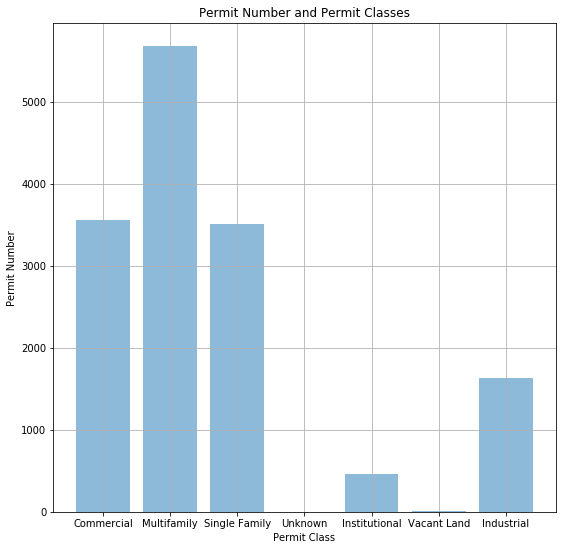

In [75]:
plt.bar(x,y, align='center', alpha=0.5)
plt.rcParams["figure.figsize"] =[9,9]
plt.title("Permit Number and Permit Classes")
plt.xlabel("Permit Class")
plt.ylabel("Permit Number")
plt.grid()
plt.show()

5680